In [2]:
import geopandas
from metpy.plots import MapPanel, PanelContainer, PlotGeometry

import requests
import os
import pandas as pd

from metpy.plots import USCOUNTIES
import cartopy.feature as cfeat

Cannot find header.dxf (GDAL_DATA is not defined)


In [71]:
WFO = 'GRR'
Begins = '2023-06-25T12:00:00Z'
Ends = '2023-06-26T12:00:00Z'
LSR_Begins = '2023-06-25T12:00Z'
LSR_Ends = '2023-06-26T12:00Z'

TitleDate = '6/25/2023'

Warn = geopandas.read_file('https://mesonet.agron.iastate.edu/api/1/cow.json?wfo='+WFO+'&begints='+Begins+'&endts='+Ends+'&hailsize=1&wind=58&phenomena=TO&phenomena=SV&phenomena=MA&phenomena=FF&phenomena=DS&lsrtype=T&lsrtype=D&lsrtype=H&lsrtype=G&lsrtype=MA&lsrtype=FF&lsrtype=DS&lsrbuffer=15&warningbuffer=1')
Warn

LSR = 'https://mesonet.agron.iastate.edu/cgi-bin/request/gis/lsr.py?wfo[]='+WFO+'&sts='+Begins+'&ets='+Ends+'&fmt=csv'
LSRFile=pd.read_csv(LSR)
LSRFile

,VALID,VALID2,LAT,LON,MAG,WFO,TYPECODE,TYPETEXT,CITY,COUNTY,STATE,SOURCE,REMARK,UGC,UGCNAME
0,202306251914,2023/06/25 19:14,42.68,-86.22,40.0,GRR,M,TSTM WND GST,2 NNW Saugatuck,LMZ845,MI,C-Man Station,Marine TStorm Gust. 40 MPH gust reported at Sa...,LMZ845,South Haven to Holland MI
1,202306251918,2023/06/25 19:18,42.68,-86.22,54.0,GRR,M,TSTM WND GST,2 NNW Saugatuck,LMZ845,MI,C-Man Station,Marine TStorm Gust. 54 MPH Gust reported at Sa...,LMZ845,South Haven to Holland MI
2,202306251926,2023/06/25 19:26,42.96,-85.94,0.25,GRR,H,HAIL,2 SSE Allendale,Ottawa,MI,Trained Spotter,Spotter reports pea sized hail in Allendale. L...,MIC139,Ottawa
3,202306251930,2023/06/25 19:30,42.77,-86.20,55.0,GRR,G,TSTM WND GST,Macatawa,Ottawa,MI,Other Federal,Delayed report. NOS station HLNM4 Holland Harbor.,MIC139,Ottawa
4,202306252020,2023/06/25 20:20,42.42,-85.23,None,GRR,D,TSTM WND DMG,2 N Bedford,Barry,MI,Public,Delayed Report... Images relayed by media of m...,MIC015,Barry
5,202306252020,2023/06/25 20:20,42.72,-85.47,None,GRR,D,TSTM WND DMG,Middleville,Barry,MI,Public,Cherry tree blown over.,MIC015,Barry
6,202306252030,2023/06/25 20:30,42.77,-85.58,None,GRR,D,TSTM WND DMG,4 WSW Caledonia,Kent,MI,Trained Spotter,Apple tree section >1 foot diameter snapped.,MIC081,Kent
7,202306252035,2023/06/25 20:35,43.34,-85.85,None,GRR,D,TSTM WND DMG,2 W Grant,Newaygo,MI,911 Call Center,911 Call Center notes multiple areas of wires ...,MIC123,Newaygo
8,202306252036,2023/06/25 20:36,43.18,-85.49,None,GRR,D,TSTM WND DMG,4 SE Cedar Springs,Kent,MI,Public,Tree blown down along with several smaller tre...,MIC081,Kent
9,202306252039,2023/06/25 20:39,42.36,-85.27,None,GRR,D,TSTM WND DMG,3 NW Springfield,Calhoun,MI,911 Call Center,911 Call Center reports multiple tree limbs an...,MIC025,Calhoun


In [74]:
i = Warn['phenomena']
color=[]
q = 0
while q < len(i):
    if i[q] == 'SV':
        color.append('Yellow')
    elif i[q] == 'TO':
         color.append('Red')
    elif i[q] =='FF':
        color.append('Green')
    elif i[q] == 'MA':
         color.append('Orange')
    elif i[q] =='DS':
        color.append('Brown')
    q+=1

d = LSRFile['TYPECODE']
LSRcolor=[]
a = 0
while a < len(d):
    if d[a] == 'H':
        LSRcolor.append('Green')
    elif d[a] == 'R':
         LSRcolor.append('None')
    elif d[a] =='T':
        LSRcolor.append('Red')
    elif d[a] == 'G':
        LSRcolor.append('blue')
         #LSRcolor.append('deepskyblue')
    elif d[a] =='D':
        LSRcolor.append('blue')
    elif d[a] =='M':
        LSRcolor.append('blue')
    a+=1
Warn['fill'] = color
Warn['stroke']='Black'
LSRFile['fill'] = LSRcolor
LSRFile['marker']='.'
LSRFile['points'] = geopandas.points_from_xy(LSRFile.LON,LSRFile.LAT)
LSRFile['stroke'] = 'Black'

In [75]:
geo = PlotGeometry()
geo.geometry = Warn['geometry']
geo.fill = Warn['fill']
geo.stroke = Warn['stroke']
geo.labels = Warn['eventid']
geo.label_fontsize = 'large'

In [76]:
lsrgeo = PlotGeometry()
lsrgeo.geometry = LSRFile['points']
lsrgeo.fill = LSRFile['fill']
lsrgeo.stroke = LSRFile['stroke']

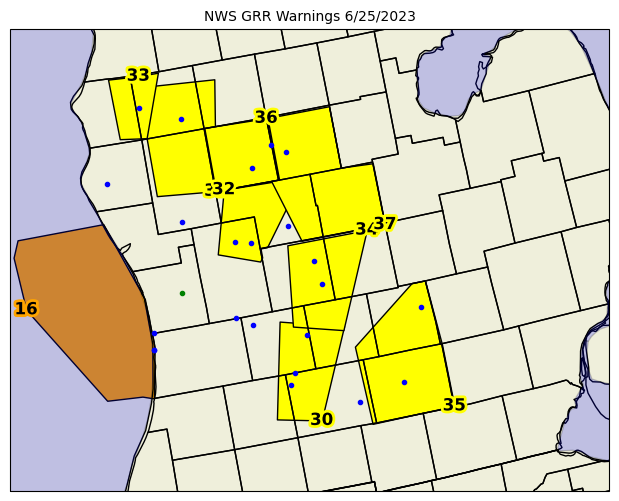

In [77]:
lake_50m = cfeat.NaturalEarthFeature('physical', 'lakes', '50m',
                                        edgecolor='blue',
                                        facecolor='blue', alpha=0.2)
panel = MapPanel()
panel.title = 'NWS '+WFO+' Warnings '+ TitleDate
#panel.area = [-86, -82, 41, 45]
panel.area = [-87, -83, 42, 44]
#panel.area = [-110, -102, 37, 41]
#panel.area = [-85, -83, 38.5, 40.5]
panel.projection = 'lcc'
panel.layers = ['land', 'ocean', 'states', 'coastline', 'borders', 'USCOUNTIES', lake_50m]
panel.plots = [geo, lsrgeo]

pc = PanelContainer()
pc.size = (10, 6)
pc.panels = [panel]
pc.show()